# **아파트 실거래가 예측 프로젝트**


## **Stage 4.  EDA 기반 시각화 및 가공 - <font color="blue">WHERE</font>  어디서 아파트 가격이 잘 나타날까?**
<img src='http://drive.google.com/uc?export=view&id=1JK2pmCr_1dguByU2R-YRBbxRzM5PoI_f' /><br>

## **INTRO**
지난 스테이지 **Stage 3.	기초 EDA 및 분석 - <font color="blue">WHAT</font> 무엇이 아파트 가격에 영향을 줄까?**에서 외부데이터를 결합하고, 변수들의 추론적 통계를 확인하여 다시 선형 회귀 모델에 적용해보았습니다 😀  

예측을 잘하려면 어떤 것이 중요할까요? 바로 예측에 사용하는 변수를 잘 파악하는 것입니다! 

다양한 **변수별 특징을 시각화**하면, **특징을 쉽게 파악하고 새로운 인사이트를 도출**하기 수월합니다  😎


이번 스테이지는 **변수들의 특징과 예측값과의 관계를 시각화**하고, **데이터 전처리 작업을 수행**하여 **다양한 모델링 기법을 적용**할 예정입니다. 

그럼, 변수와 예측값과의 연관성을 발견할 준비가 되셨을까요? 바로 시작하겠습니다!

먼저, 한글 폰트를 설정하기 위한 약간의 준비를 하겠습니다! 한글 폰트를 다운로드하고, 적용하는 코드입니다.

In [1]:
# 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

### **1. 변수별 특징 및 예측값과의 관계 시각화**
이번에는 판다스와 함께 numpy 라이브러리를 사용하여 변수별 특징을 파악하는데에 사용할게요.    
numpy 라이브러리도 함께 임포트해주세요!

In [3]:
import pandas as pd
import numpy as np


이전에 외부데이터와 결합한 데이터를 불러옵니다.

In [4]:
# 외부데이터 결합한 데이터
train = pd.read_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/data+other/train_with_other_data.csv')
test = pd.read_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/data+other/test_with_other_data.csv')

Mounted at /content/drive


사용하지 않는 법정동명, 자치구명, 거래일자 컬럼을 제외해줍니다.

In [5]:
drop_col = ['dong', '시군구명', 'transaction_ymd']
train = train.drop(drop_col, axis=1)
test = test.drop(drop_col, axis=1)

#### 1-1. 변수별 특징
연속형 변수를 골라서 cont_col에 함께 선언할게요.    
연속형 변수로는 **전용면적, 아파트 실거래가, 인구밀도, 기준금리, 정당(우) 개수, 정당(좌) 개수, 정당(기타) 개수, 전세가격, 주변 역 개수, 주변 자율형사립고등학교 개수, 졸업생 수, 공원 개수, 어린이집 개수**가 있겠네요!

describe() 함수를 사용하여 값의 분포를 확인해봅시다.

In [6]:
cont_col = ['exclusive_use_area', 'transaction_real_price', '인구밀도', '기준금리', '정당_우', '정당_좌', '정당_기타',
       'jeonse', 'num_station', 'num_school', 'num_alumni', 'park_number',
       'center_number']

train[cont_col].describe()

,exclusive_use_area,transaction_real_price,인구밀도,기준금리,정당_우,정당_좌,정당_기타,jeonse,num_station,num_school,num_alumni,park_number,center_number
count,762592.000000,762592.000000,762592.000000,762592.000000,762592.000000,762592.000000,762592.000000,762592.000000,762592.000000,762592.000000,762592.000000,762592.00000,762592.000000
mean,77.922848,49114.547481,18322.840287,2.222757,6.116859,9.431756,10.037222,74.938560,11.065887,1.033193,415.632737,66.76995,284.507789
std,28.576911,33654.673087,4460.565341,0.988619,2.054930,2.355509,2.591444,13.642412,5.072211,0.849531,398.765759,68.26081,183.854888
min,11.955900,350.000000,6771.000000,1.250000,1.000000,4.000000,4.000000,45.826755,1.000000,0.000000,0.000000,1.00000,36.000000
25%,59.740000,29000.000000,16119.000000,1.500000,5.000000,8.000000,8.000000,63.829400,7.000000,0.000000,0.000000,9.00000,184.000000
50%,83.090000,40000.000000,17909.000000,2.000000,6.000000,9.000000,10.000000,77.216332,12.000000,1.000000,381.000000,41.00000,255.000000
75%,84.960000,58000.000000,20125.000000,2.500000,7.000000,11.000000,12.000000,87.614982,13.000000,1.000000,577.000000,109.00000,334.000000
max,424.320000,820000.000000,29183.000000,5.250000,10.000000,14.000000,18.000000,97.595844,23.000000,3.000000,1788.000000,226.00000,874.000000


연속형 변수의 값이 실거래가별로 어떻게 분포하고 있는지 확인해봅시다.   
시각화에 사용할 matplotlib와 seaborn 라이브러리를 각각 임포트합니다.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

##### **Inst.**
seaborn의 distplot으로 값의 분포를 보여주는 히스토그램을 그릴 수 있습니다.    
아파트 실거래가 변수의 히스토그램을 그려볼까요?    

In [ ]:
# 1. train의 'transaction_real_price를 sns를 통해 plot 해보세요.

# 2. 그래프의 title을 Distribution of target variable(price)로 설정하고 show 해보세요.


##### **Hint.**
- sns에서 displot()을 사용하면 데이터를 시각화 할 수 있습니다.
- plt를 통해 title과 show를 이용할 수 있습니다.

##### **Solution**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


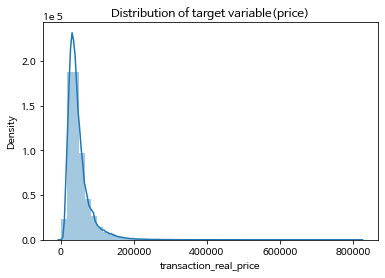

In [10]:
# 1. train의 'transaction_real_price를 sns를 통해 plot 해보세요.
sns.distplot(train['transaction_real_price'])

# 2. 그래프의 title을 Distribution of target variable(price)로 설정하고 show 해보세요
plt.title(f'Distribution of target variable(price)')
plt.show()

<font color="orange">**Seaborn(sns)**</font>는 시각화에 많이 사용되며 regplot, jointplot, kde, boxplot, barplot 등 다양한 시각화 도구를 가지고 있습니다.<br/>추후에 기회가 되시면 사용해보세요!
<br/>최대 80억까지 존재하지만, 대부분 20억 이내로 분포하고 있네요!    
이번에는 전체 연속형 컬럼을 대상으로 히스토그램을 그려보겠습니다.    
빨강 세로선은 평균, 초록 세로선은 중앙값을 나타내도록 그래프에 추가하고, 그래프 출력 범위를 3-시그마 범위로 제한했어요~

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


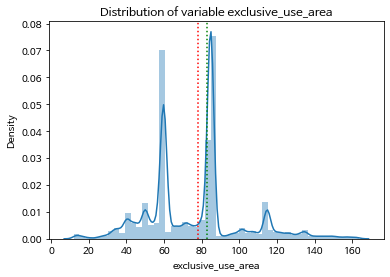

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


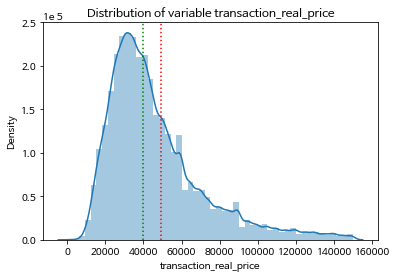

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


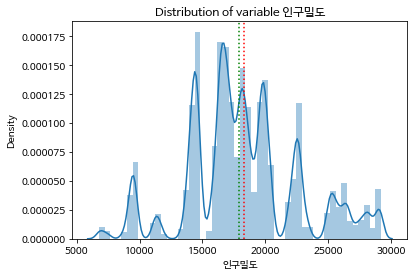

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


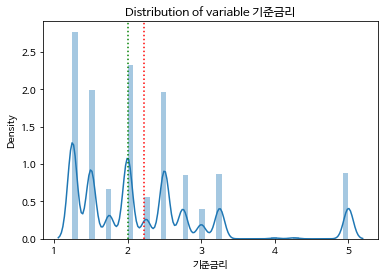

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


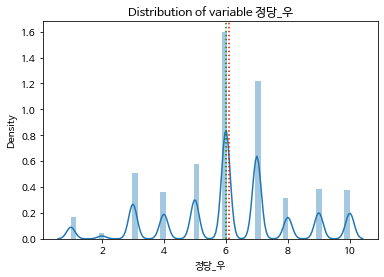

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


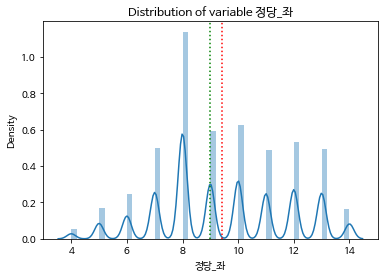

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


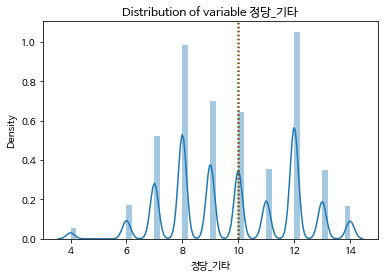

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


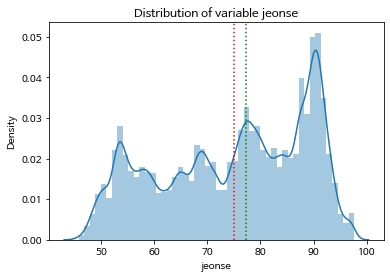

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


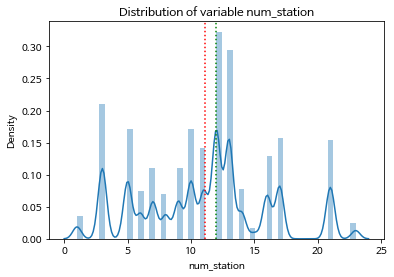

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


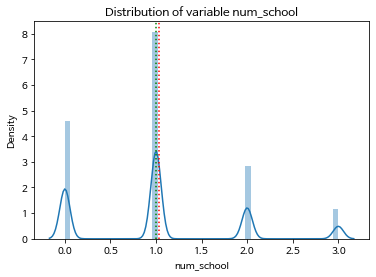

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


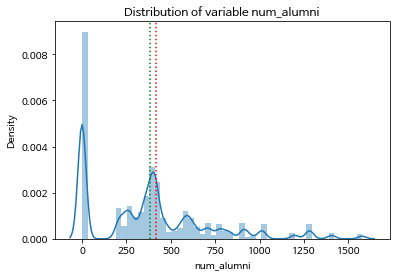

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


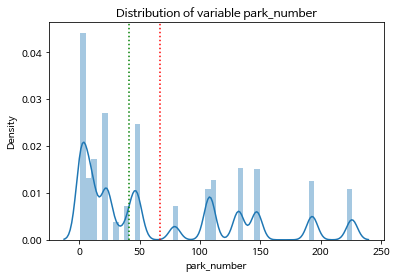

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


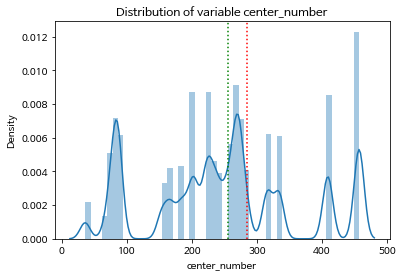

In [11]:
for c in cont_col:
    mean = np.mean(train[c])
    std = np.sqrt(np.var(train[c]))

    sns.distplot((train[train[c] <=mean+3*std][c])) # 3-sigma
    plt.title(f'Distribution of variable '+c)
    plt.axvline(x=mean, color='r', linestyle=':')
    plt.axvline(x=np.median(train[c]), color='g', linestyle=':')
    plt.show()

더 자세하게 값을 볼 수 있네요~ 오른쪽, 왼쪽으로 치우친 값이 많이 보여요!    
아파트 실거래가 변수의 히스토그램을 다시 확인해볼까요?

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


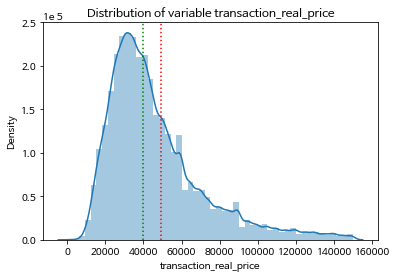

In [12]:
mean = np.mean(train['transaction_real_price'])
std = np.sqrt(np.var(train['transaction_real_price']))

sns.distplot((train[train['transaction_real_price'] <=mean+3*std]['transaction_real_price'])) # 3-sigma
plt.title(f'Distribution of variable transaction_real_price')
plt.axvline(x=mean, color='r', linestyle=':')
plt.axvline(x=np.median(train['transaction_real_price']), color='g', linestyle=':')
plt.show()

20억 이내 범위에서도 2억~4억 사이에 많이 분포하고 있네요!     
평균이 중앙값보다 오른쪽에 위치한 것을 보니, 큰 거래가가 적지 않게 있는것 같아요 😯

#### 1-2. 예측값과의 관계 시각화
예측값인 아파트 실거래가와 다른 변수들 사이의 관계를 확인하는 것 역시 중요하죠.   
산점도를 활용하여 예측값과의 관계를 나타내봅시다!

예측값과 비교할 예정이니, cont_col에서 예측값 컬럼은 제외할게요.

In [13]:
cont_col.remove('transaction_real_price')

scatter() 함수를 사용하여 전세 가격과 아파트 실거래가를 비교하는 산점도를 그려볼까요?    

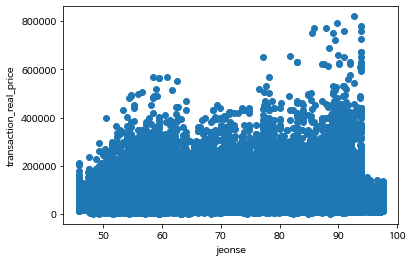

                        transaction_real_price    jeonse
transaction_real_price                1.000000  0.116803
jeonse                                0.116803  1.000000


In [14]:
plt.scatter(train['jeonse'], train['transaction_real_price'])
plt.xlabel("jeonse")
plt.ylabel('transaction_real_price')
plt.show()

print(train[['transaction_real_price',"jeonse"]].corr())

전세가격이 높을수록 실거래가가 높게 분포하는 경향이 약간 보입니다.    
상관관계도 양의 상관관계로 나왔네요!    
다른 모든 연속형 변수에 대해서 실거래가 변수와의 관계를 알아볼까요?

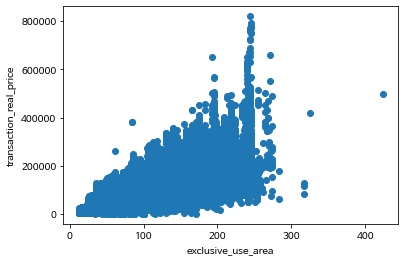

                        transaction_real_price  exclusive_use_area
transaction_real_price                1.000000            0.668721
exclusive_use_area                    0.668721            1.000000


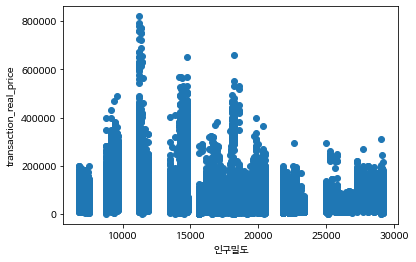

                        transaction_real_price     인구밀도
transaction_real_price                 1.00000 -0.22154
인구밀도                                  -0.22154  1.00000


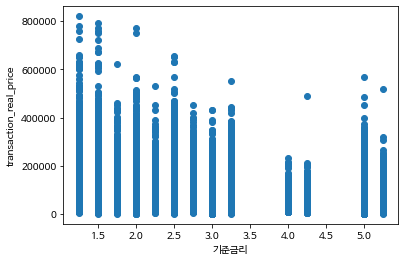

                        transaction_real_price      기준금리
transaction_real_price                1.000000 -0.138458
기준금리                                 -0.138458  1.000000


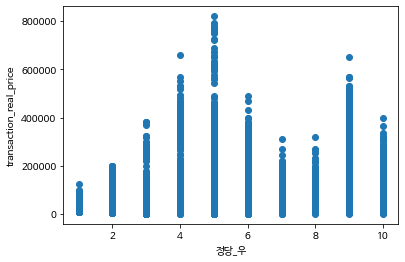

                        transaction_real_price      정당_우
transaction_real_price                1.000000  0.258052
정당_우                                  0.258052  1.000000


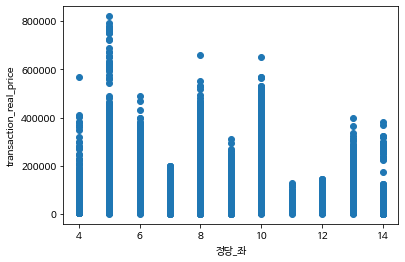

                        transaction_real_price      정당_좌
transaction_real_price                1.000000 -0.082203
정당_좌                                 -0.082203  1.000000


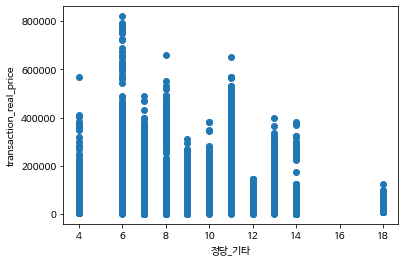

                        transaction_real_price     정당_기타
transaction_real_price                1.000000 -0.078672
정당_기타                                -0.078672  1.000000


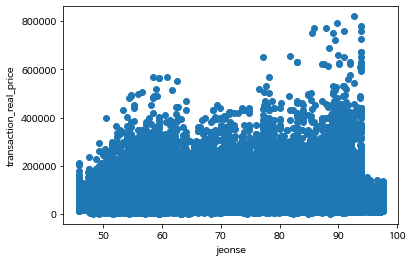

                        transaction_real_price    jeonse
transaction_real_price                1.000000  0.116803
jeonse                                0.116803  1.000000


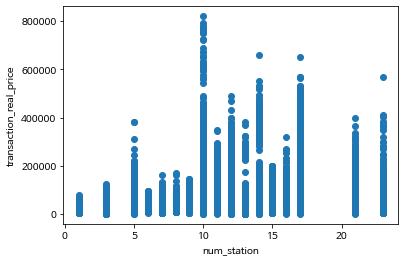

                        transaction_real_price  num_station
transaction_real_price                1.000000     0.325297
num_station                           0.325297     1.000000


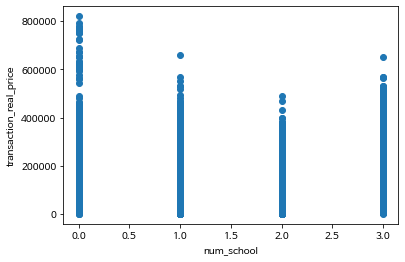

                        transaction_real_price  num_school
transaction_real_price                1.000000    0.363723
num_school                            0.363723    1.000000


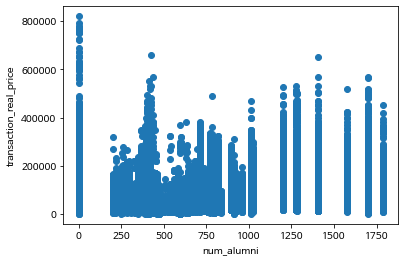

                        transaction_real_price  num_alumni
transaction_real_price                1.000000    0.369851
num_alumni                            0.369851    1.000000


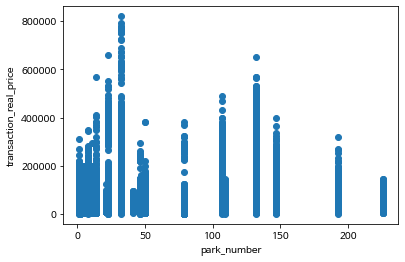

                        transaction_real_price  park_number
transaction_real_price                 1.00000      0.24231
park_number                            0.24231      1.00000


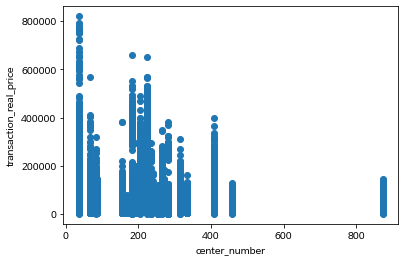

                        transaction_real_price  center_number
transaction_real_price                1.000000      -0.135667
center_number                        -0.135667       1.000000


In [15]:
for c in cont_col:
    plt.scatter(train[c], train['transaction_real_price'])
    plt.xlabel(c)
    plt.ylabel('transaction_real_price')
    plt.show()

    print(train[['transaction_real_price',c]].corr())

모든 연속형 변수에 대해 분포가 잘 나타난 것을 볼 수 있네요!   
대표적으로 전용면적과 기준금리, 인구밀도만 확인해볼까요?

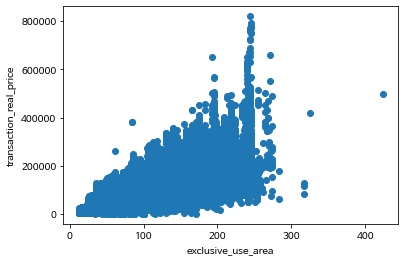

                        transaction_real_price  exclusive_use_area
transaction_real_price                1.000000            0.668721
exclusive_use_area                    0.668721            1.000000


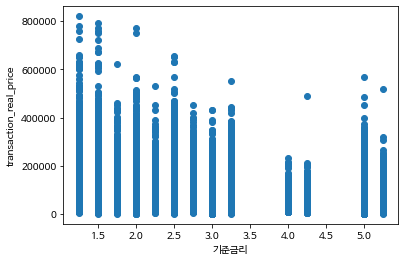

                        transaction_real_price      기준금리
transaction_real_price                1.000000 -0.138458
기준금리                                 -0.138458  1.000000


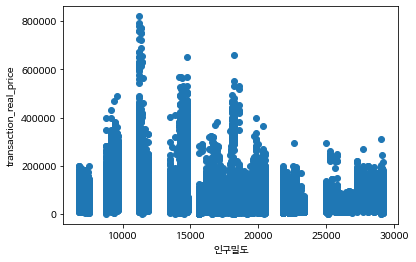

                        transaction_real_price     인구밀도
transaction_real_price                 1.00000 -0.22154
인구밀도                                  -0.22154  1.00000


In [16]:
for c in ['exclusive_use_area', '기준금리', '인구밀도']:
    plt.scatter(train[c], train['transaction_real_price'])
    plt.xlabel(c)
    plt.ylabel('transaction_real_price')
    plt.show()

    print(train[['transaction_real_price',c]].corr())

전용면적이 클수록, 기준금리와 인구밀도가 낮을수록 높은 실거래가를 가지고 있는 것으로 보여지네요!

다음으로 범주형 변수를 시각화해볼까요?   
확인할 번주형 변수는 두 가지로, 층수(floor)와 아파트 나이(life_of_apartment)입니다.   
먼저, 층수를 확인해보죠!

unique() 함수로 데이터프레임에 구성된 유일한 값을 확인할 수 있어요.    
층수는 지하 4층부터 69층까지 다양하게 구성되어 있네요!

In [17]:
np.unique(train['floor'])

array([-4, -3, -2, -1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69])

층별로 기술 통계값을 구하는 과정입니다!    
각 층마다 기술 통계 요소를 구해서 데이터프레임에 저장합니다.

In [18]:
floor_summary = pd.DataFrame({'floor':[],
                             'count':[],
                             'min':[],
                             'mean':[],
                             'median':[],
                             'max':[],
                             'std':[],
                             'range':[]})
for c in np.unique(train['floor']):
  tmp = train[train['floor'] == c][['transaction_real_price']]
  cnt = np.shape(train[train['floor'] == c][['transaction_real_price']])[0]
  min = int(np.min(tmp))
  mean = int(np.mean(tmp))
  median = int(np.median(tmp))
  max = int(np.max(tmp))
  std = int(np.sqrt(np.var(tmp)))
  rg = int(max - min)

  tmp_df = pd.DataFrame({'floor':[c],
                         'count':[cnt],
                          'min':[min],
                          'mean':[mean],
                         'median':[median],
                          'max':[max],
                          'std':[std],
                          'range':[rg]})
  floor_summary = pd.concat([floor_summary, tmp_df])

기술 통계값을 int형으로 변환하고 출력해봅시다.

In [19]:
floor_summary = floor_summary.astype('int')
floor_summary

,floor,count,min,mean,median,max,std,range
0,-4,4,55567,61454,62600,65050,3543,9483
0,-3,7,51000,58608,55181,70500,6283,19500
0,-2,16,37000,159565,58468,624000,212511,587000
0,-1,117,4500,56523,26500,575000,96608,570500
0,1,47298,2000,46024,37500,727000,32822,725000
...,...,...,...,...,...,...,...,...
0,65,3,117300,130766,136000,139000,9600,21700
0,66,4,128000,297000,305000,450000,114179,322000
0,67,2,105000,141500,141500,178000,36500,73000
0,68,5,133500,208900,185000,340000,74131,206500


생각보다 층이 많아서 보기 어렵네요 😢    
그래프로 나타내봅시다!    
plot() 함수로 각 기술 통계를 시각화할 수 있습니다.

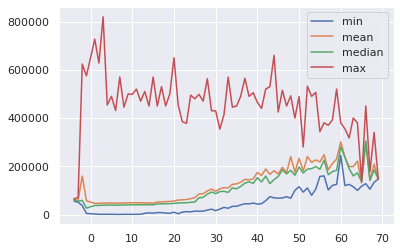

In [ ]:
plt.plot(floor_summary['floor'],floor_summary['min'])
plt.plot(floor_summary['floor'],floor_summary['mean'])
plt.plot(floor_summary['floor'],floor_summary['median'])
plt.plot(floor_summary['floor'],floor_summary['max'])
plt.legend(labels = ['min','mean','median','max'],loc = 'upper right')
plt.show()

평균적으로 층이 높을수록 실거래가가 높은 경향이 나타나네요!    
특이하게 최대값은 낮은 층에서 높은 실거래가를 보여줍니다 🤔    

이제 건물의 나이를 살펴볼까요?    


In [ ]:
np.unique(train['life_of_apartment'])

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 54, 55])

건물의 나이는 완공 이전에 거래된 것으로 추정되는 -1년부터 55년까지 다양하게 분포하고 있네요!    
건물의 나이이 대해서도 기술 통계값을 구해봅시다!

In [ ]:
life_of_apartment_summary = pd.DataFrame({'life_of_apartment':[],
                             'count':[],
                             'min':[],
                             'mean':[],
                             'median':[],
                             'max':[],
                             'std':[],
                             'range':[]})
for c in np.unique(train['life_of_apartment']):
  tmp = train[train['life_of_apartment'] == c][['transaction_real_price']]
  cnt = np.shape(train[train['life_of_apartment'] == c][['transaction_real_price']])[0]
  min = int(np.min(tmp))
  mean = int(np.mean(tmp))
  median = int(np.median(tmp))
  max = int(np.max(tmp))
  std = int(np.sqrt(np.var(tmp)))
  rg = int(max - min)

  tmp_df = pd.DataFrame({'life_of_apartment':[c],
                         'count':[cnt],
                          'min':[min],
                          'mean':[mean],
                         'median':[median],
                          'max':[max],
                          'std':[std],
                          'range':[rg]})
  life_of_apartment_summary = pd.concat([life_of_apartment_summary, tmp_df])

In [ ]:
life_of_apartment_summary = life_of_apartment_summary.astype('int')
life_of_apartment_summary

,life_of_apartment,count,min,mean,median,max,std,range
0,-1,3,16000,17500,17500,19000,1224,3000
0,0,13157,630,47470,37900,565000,36222,564370
0,1,15906,4500,56892,45875,549913,43578,545413
0,2,15161,7100,59679,52000,570000,40550,562900
0,3,18290,500,57776,49000,656500,39429,656000
0,4,25254,4600,54490,45000,770000,39386,765400
0,5,27651,3300,55396,44700,820000,43140,816700
0,6,28359,3000,54928,44700,780000,42736,777000
0,7,28003,5500,53296,43000,520000,36078,514500
0,8,30711,1262,53310,43000,570000,35949,568738


역시 한 눈에 보기는 어렵네요..   
그래프로 시각화해서 살펴봅시다!

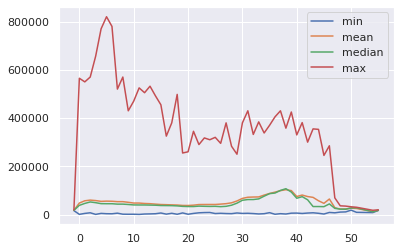

In [ ]:
plt.plot(life_of_apartment_summary['life_of_apartment'],life_of_apartment_summary['min'])
plt.plot(life_of_apartment_summary['life_of_apartment'],life_of_apartment_summary['mean'])
plt.plot(life_of_apartment_summary['life_of_apartment'],life_of_apartment_summary['median'])
plt.plot(life_of_apartment_summary['life_of_apartment'],life_of_apartment_summary['max'])
plt.legend(labels = ['min','mean','median','max'],loc = 'upper right')
plt.show()

최대값이 타 기술 통계값보다 지나치게 커서 제외하고 다시 시각화하겠습니다.

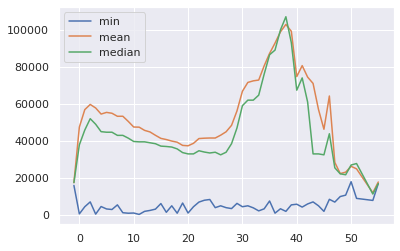

In [ ]:
plt.plot(life_of_apartment_summary['life_of_apartment'],life_of_apartment_summary['min'])
plt.plot(life_of_apartment_summary['life_of_apartment'],life_of_apartment_summary['mean'])
plt.plot(life_of_apartment_summary['life_of_apartment'],life_of_apartment_summary['median'])
plt.legend(labels = ['min','mean','median'],loc = 'upper left')
plt.show()

0 ~ 10년 사이의 신축 아파트보다도 30 ~ 40년 이상된 건물에서 높은 실거래가가 나타나네요!    
재개발을 예상한 구매일지도 모르겠습니다. 🤔

### **2. 데이터 전처리(스케일링, 이상치 처리 등)**
변수별 특징을 파악했다면, 파악한 특징을 토대로 전처리 작업을 수행해야 합니다.   

#### 2-1. 결측치 처리
결측치는 예측에 치명적인 영향을 미칠 수 있기 때문에, 의도되지 않은 경우 가급적 삭제하거나 대치되는 방식으로 처리되어야 합니다.    
데이터에도 결측치가 있는지 확인해볼까요?    
isna() 함수로 결측치 여부를 파악하고(True/False), sum()으로 결측치가 몇 개씩 있는지 확인할 수 있어요.  

In [ ]:
train.isna().sum()

exclusive_use_area        0
floor                     0
transaction_real_price    0
인구밀도                      0
기준금리                      0
정당_우                      0
정당_좌                      0
정당_기타                     0
jeonse                    0
num_station               0
num_school                0
num_alumni                0
park_number               0
center_number             0
life_of_apartment         0
dtype: int64

저희가 사용할 데이터는 다행히 결측치가 없네요!   
결측치는 추가로 처리하지 않고 넘어가도록 하겠습니다~

#### 2-2. 이상치
결측치 다음으로 주의깊게 살펴봐야하는 것은 이상치입니다.   
이상치를 측정할 변수를 box_col로 선언할게요.


In [20]:
box_col = ['exclusive_use_area', '인구밀도', '기준금리', '정당_우', '정당_좌', '정당_기타',
       'jeonse', 'num_station', 'num_school', 'num_alumni', 'park_number',
       'center_number']

boxplot() 함수로 상자그림을 그려봅시다!

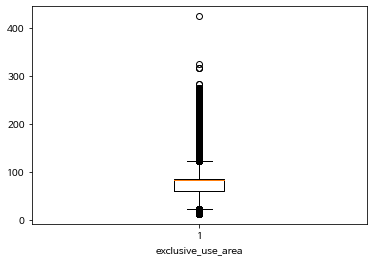

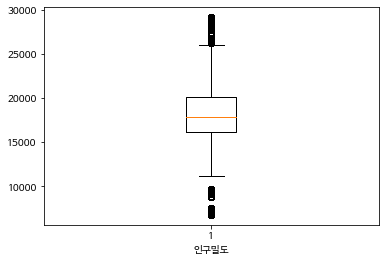

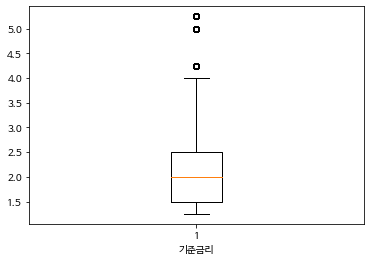

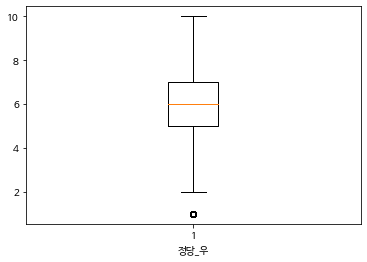

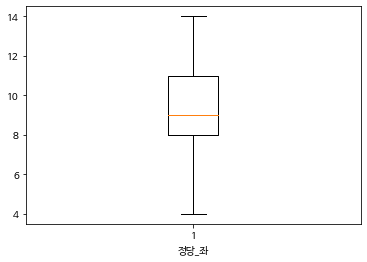

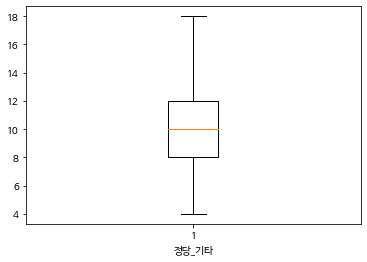

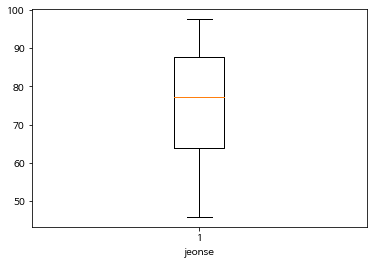

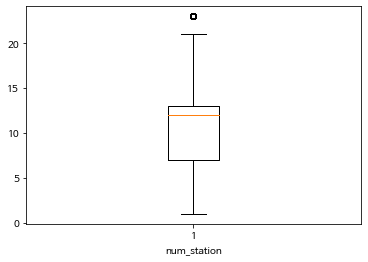

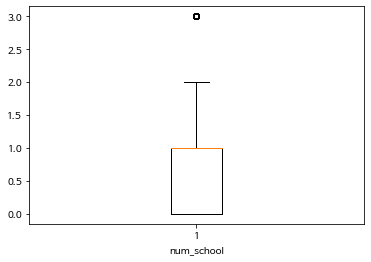

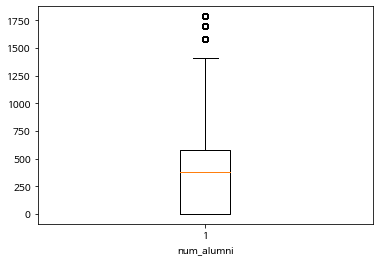

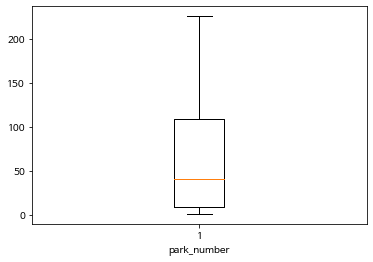

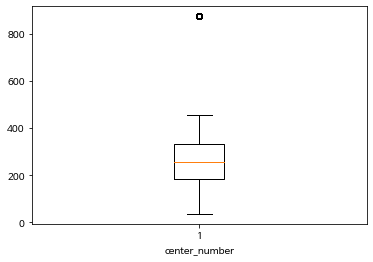

In [21]:
for c in box_col:
    plt.boxplot(train[c])
    plt.xlabel(c)
    plt.show()

전용면적과 인구밀도의 상자그림에서 이상치가 높게 나타나네요!    
아파트 실거래가 변수의 상자 그림을 그려볼까요?

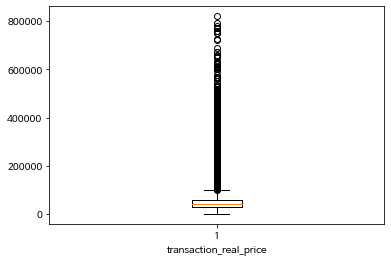

In [22]:
plt.boxplot(train['transaction_real_price'])
plt.xlabel('transaction_real_price')
plt.show()

이상치가 상당히 많이 나타납니다 😯    
이상치 처리를 위해 사분위수의 25%, 75% 값을 구하고, IQR를 구해봐야겠어요!

In [23]:
Q1 = train['transaction_real_price'].quantile(q=0.25)
Q3 = train['transaction_real_price'].quantile(q=0.75)
print(Q1)
print(Q3)

IQR = Q3-Q1
IQR

29000.0
58000.0


29000.0


전체 데이터 개수 중 Q1-1.5 * IQR 보다 작은 데이터의 개수와 Q3+1.5 * IQR 보다 큰 데이터의 개수를 알아볼까요?


In [24]:
print(len(train)) # 전체 데이터 개수

762592


In [25]:
# Q1-1.5*IQR 보다 작은 데이터 개수
len(train[train['transaction_real_price'] < (Q1-1.5*IQR)])

0

In [26]:
# Q3+1.5*IQR 보다 큰 데이터의 개수
len(train[train['transaction_real_price'] > (Q3+1.5*IQR)])

47663

Q3+1.5 * IQR 보다 큰 데이터가 어떻게 구성되어 있을까요?

In [27]:
train[train['transaction_real_price'] > (Q3+1.5*IQR)].sort_values(by=['transaction_real_price'], ascending=False)[:20]

,exclusive_use_area,floor,transaction_real_price,인구밀도,기준금리,정당_우,정당_좌,정당_기타,jeonse,num_station,num_school,num_alumni,park_number,center_number,life_of_apartment
23603,244.749,3,820000,11209,1.25,5,5,6,92.576053,10,0,0,32,36,5
21257,244.783,3,790000,11209,1.50,5,5,6,89.841483,10,0,0,32,36,5
671985,244.783,3,780000,11179,1.25,5,5,6,93.799646,10,0,0,32,36,6
19270,244.749,3,770000,11337,2.00,5,5,6,85.870988,10,0,0,32,36,4
20395,244.783,3,770000,11337,1.50,5,5,6,87.931777,10,0,0,32,36,4
672728,244.749,3,760000,11179,1.50,5,5,6,93.930648,10,0,0,32,36,6
22286,244.749,3,760000,11209,1.25,5,5,6,90.979847,10,0,0,32,36,5
19092,244.783,3,750000,11337,2.00,5,5,6,85.475659,10,0,0,32,36,4
20888,244.783,3,750000,11337,1.50,5,5,6,89.030719,10,0,0,32,36,4
672291,243.642,1,727000,11179,1.25,5,5,6,93.808591,10,0,0,32,36,6


확인해보니, 동일한 지역에서 거래된 높은 실거래가를 가진 아파트로 보입니다..!   
해당 데이터를 임의로 삭제하거나 대치하는 것은 좋지 않을 것 같아요 😢    

이상치를 삭제하거나 대치하고 싶으신 경우, 아래 주석 처리된 코드를 활용해주세요!

In [ ]:
# 이상치를 삭제한다면, 
# train = train[(train['transaction_real_price'] >= (Q1-1.5*IQR)) & (train['transaction_real_price'] <= (Q3+1.5*IQR))] 

# 이상치를 대치한다면, 
# train[train['transaction_real_price'] > (Q3+1.5*IQR)] = Q3+1.5*IQR

#### 2-3. 스케일링
머신러닝 데이터를 학습할 때, 특성별로 데이터의 스케일이 다르다면 모델이 잘 동작하지 않을 수 있습니다.    
데이터 스케일링으로 데이터의 스케일을 적용해봅시다!    
바로 학습에 사용할 수 있도록 훈련 데이터와 test 데이터셋으로 분리하고 시작하죠!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split( train.drop('transaction_real_price', axis=1), train['transaction_real_price'], test_size=0.2, random_state=42)

스케일링에 사용할 sklearn의 RobustScaler 라이브러리를 임포트해줍시다. 

In [ ]:
from sklearn.preprocessing import RobustScaler


Robust Scaler는 평균과 분산 대신에 중간 값과 사분위 값을 사용하여 스케일링을 진행하기 때문에 이상치에 비교적 덜 민감합니다.    
이전에 이상치가 많았던 컬럼인 전용면적(exclusive_use_area)과 인구밀도에 Robust Scaler()를 적용해볼까요?  
train 데이터에는 fit()과 transform()을 모두 수행하지만, test 데이터는 transform()만 수행해야해요!    
##### **Inst.**
1. RobustScaler() 객체 rbs를 생성합니다.
2. **train_X 데이터셋**에서 'exclusive_use_area'와 '인구밀도' 열(column)을 선택하여, rbs 객체를 사용하여 **스케일링 학습**을 수행합니다.
3. **train_X 데이터셋**에서 'exclusive_use_area'와 '인구밀도' 열(column)을 선택하여, rbs 객체를 사용하여 **스케일링**을 수행합니다.
4. **test_X 데이터셋**에서 'exclusive_use_area'와 '인구밀도' 열(column)을 선택하여, rbs 객체를 사용하여 **스케일링**을 수행합니다.

##### **Hint.**
RobustScaler()는 이상치(outliers)가 있는 데이터셋을 스케일링할 때 사용하는 Scikit-learn 라이브러리의 함수입니다.     
RobustScaler는 중앙값(median)과 IQR(interquartile range)를 사용하여 데이터를 스케일링하며, 아웃라이어(outlier)의 영향을 최소화합니다.

fit()은 주어진 데이터셋에 대해 RobustScaler()를 학습시키기 위한 메소드입니다.    fit() 메소드를 호출하여 학습된 RobustScaler() 객체를 반환하며, 이 객체는 이후에 transform() 메소드를 사용하여 스케일링할 데이터셋에 적용됩니다.

fit() 메소드의 입력 파라미터는 다음과 같아요.

- X (array-like): 스케일링할 데이터셋. 2차원 배열 형태로 입력해야 합니다.


##### **Solution.**
test_X 데이터셋에서 'exclusive_use_area'와 '인구밀도' 컬럼을 선택하여, rbs 객체를 사용하여 스케일링을 수행해봅시다!

In [ ]:
rbs = RobustScaler()
rbs.fit(train_X[['exclusive_use_area', '인구밀도']])

train_X[['exclusive_use_area', '인구밀도']] = rbs.transform(train_X[['exclusive_use_area', '인구밀도']])
test_X[['exclusive_use_area', '인구밀도']] = rbs.transform(test_X[['exclusive_use_area', '인구밀도']])

남은 컬럼 중 연속형 컬럼에 대해 MinMaxScaler()로 스케일링을 수행해볼까요?    
sklearn의 MinMaxScaler도 임포트해주세요~

In [ ]:
from sklearn.preprocessing import MinMaxScaler

MinMax Scaler를 적용할 컬럼을 mms_col로 선언합니다.

In [ ]:
mms_col = train.columns
mms_col = mms_col.drop(['transaction_real_price', 'life_of_apartment', 'floor'])
mms_col

Index(['exclusive_use_area', '인구밀도', '기준금리', '정당_우', '정당_좌', '정당_기타', 'jeonse',
       'num_station', 'num_school', 'num_alumni', 'park_number',
       'center_number'],
      dtype='object')

train 데이터와 test 데이터에 대해 MinMaxScaler()로 스케일링을 적용해줍시다!

In [ ]:
mms = MinMaxScaler()
mms.fit(train_X[mms_col])
train_X[mms_col] = mms.transform(train_X[mms_col])
test_X[mms_col] = mms.transform(test_X[mms_col])

이제 스케일링이 적용된 데이터를 확인해볼까요?

In [ ]:
train_X.head()

,exclusive_use_area,floor,인구밀도,기준금리,정당_우,정당_좌,정당_기타,jeonse,num_station,num_school,num_alumni,park_number,center_number,life_of_apartment
676610,0.176165,6,0.525611,0.0625,0.333333,0.4,0.285714,0.891658,0.590909,0.333333,0.234899,0.097778,0.176611,10
307054,0.116315,5,0.432848,0.9375,0.777778,0.4,0.285714,0.136590,0.681818,0.333333,0.159955,0.853333,0.058473,7
524741,0.116363,3,0.121810,0.3750,0.555556,0.2,0.214286,0.558290,0.500000,0.666667,0.500559,0.471111,0.200477,14
489497,0.115490,11,0.530653,0.9375,0.000000,0.9,1.000000,0.131122,0.090909,0.333333,0.196868,0.088889,0.280430,4
248621,0.114690,11,0.446680,0.4375,0.222222,1.0,0.714286,0.432668,0.545455,0.666667,0.333333,0.346667,0.294749,14


스케일링이 잘 적용되었네요 😀

### **3. 모델링 비교**


#### 3-1. 선형 회귀: Stage4 vs Stage2, Stage3
스케일링한 데이터로 다시 선형회귀 모델을 학습해봐요!   

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lrmodel = LinearRegression()
lrmodel.fit(train_X, train_Y)

LinearRegression()

In [ ]:
# RSME 성능평가 계산을 위한 라이브러리
from sklearn.metrics import mean_squared_error

def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

In [ ]:
print(RMSE(lrmodel.predict(train_X), train_Y))
print(RMSE(lrmodel.predict(test_X), test_Y))

20214.41472030412
20196.69586678205


음.. Stage2 모델보다는 성능이 좋지만, Stage3 모델과는 큰 차이가 없네요 🤔    
이제 다양한 학습 모델을 적용하며, 성능을 높여볼 기회가 왔네요! 

#### 3-2. 다양한 모델링 기법 적용
이번에 AutoML 라이브러리인 optuna를 사용하여 다양한 머신러닝 모델을 학습해봅시다!    
먼저 optuna 라이브러리를 설치해주세요~

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 10.7 MB/s eta 0:00:00


optuna와 함께 머신러닝, 성능평가, 도구 라이브러리를 임포트합니다.

In [ ]:
from optuna.integration import XGBoostPruningCallback
import optuna

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import mean_squared_error

from tqdm import tqdm
import re

프로젝트의 평가 기준인 RMSE를 sklearn 라이브러리리의 mean_squared_error()로 함수를 선언했어요 😀     
다양한 모델의 학습에 사용할 수 있도록 CV 별로 학습하는 rmse_cv() 함수도 있으니, 확인해주세요!    
CV 별로 RMSE 점수를 프린트하는 print_rmse_score() 함수도 있답니다~

In [ ]:
def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

def rmse_cv(model):
    # cv별로 학습하는 함수
    tscv = TimeSeriesSplit(n_splits=10)
    rmse_list = []
    model_name = model.__class__.__name__
    for _, (train_index, test_index) in tqdm(enumerate(tscv.split(train_X), start=1), desc=f'{model_name} Cross Validations...', total=10):
        X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
        y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]
        clf = model.fit(X_train, y_train)
        pred = clf.predict(X_test)
        rmse = RMSE(y_test, pred) 
        rmse_list.append(rmse)
    return model_name, rmse_list

def print_rmse_score(model):
    # cv별 프린팅, 평균 저장
    model_name, score = rmse_cv(model)
    for i, r in enumerate(score, start=1):
        print(f'{i} FOLDS: {model_name} RMSLE: {r:.4f}')
    print(f'\n{model_name} mean RMSLE: {np.mean(score):.4f}')
    print('='*40)
    return model_name, np.mean(score)

익숙한 선형 회귀 모델부터 Lasso, ElasticNet, RandomForest 등 다양한 머신러닝 모델을 선언해봐요!

In [ ]:
reg = LinearRegression(n_jobs=-1)
ridge = Ridge(alpha=0.8, random_state=1)
lasso = Lasso(alpha = 0.01, random_state=1)
Enet = ElasticNet(alpha=0.03, l1_ratio=0.01, random_state=1)
DTree = DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=15, random_state=1)
rf = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=9, min_samples_split=50,
                           min_samples_leaf=5, random_state=1, n_jobs=-1)
model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=9, min_child_weight=5, gamma=0.1, n_jobs=-1)
model_lgb = lgb.LGBMRegressor(n_estimators=500, max_depth=9, min_child_weight=5, n_jobs=-1)

이제 모델별로 학습을 시작해볼까요?

In [ ]:
models = []
scores = []
for model in [reg, ridge, lasso, Enet, DTree, rf, model_xgb, model_lgb]:
    model_name, mean_score = print_rmse_score(model)
    models.append(model_name)
    scores.append(mean_score)

LinearRegression Cross Validations...: 100%|██████████| 10/10 [00:02<00:00,  4.43it/s]


1 FOLDS: LinearRegression RMSLE: 20319.8971
2 FOLDS: LinearRegression RMSLE: 20331.7126
3 FOLDS: LinearRegression RMSLE: 20629.0139
4 FOLDS: LinearRegression RMSLE: 19566.1282
5 FOLDS: LinearRegression RMSLE: 20033.6878
6 FOLDS: LinearRegression RMSLE: 20296.9886
7 FOLDS: LinearRegression RMSLE: 20158.0851
8 FOLDS: LinearRegression RMSLE: 20094.4836
9 FOLDS: LinearRegression RMSLE: 20267.1643
10 FOLDS: LinearRegression RMSLE: 20351.9943

LinearRegression mean RMSLE: 20204.9156


Ridge Cross Validations...: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


1 FOLDS: Ridge RMSLE: 20319.0824
2 FOLDS: Ridge RMSLE: 20331.4929
3 FOLDS: Ridge RMSLE: 20629.3470
4 FOLDS: Ridge RMSLE: 19565.6525
5 FOLDS: Ridge RMSLE: 20033.6783
6 FOLDS: Ridge RMSLE: 20297.0484
7 FOLDS: Ridge RMSLE: 20158.0636
8 FOLDS: Ridge RMSLE: 20094.4936
9 FOLDS: Ridge RMSLE: 20267.2323
10 FOLDS: Ridge RMSLE: 20352.0724

Ridge mean RMSLE: 20204.8163


Lasso Cross Validations...: 100%|██████████| 10/10 [00:16<00:00,  1.68s/it]


1 FOLDS: Lasso RMSLE: 20319.8959
2 FOLDS: Lasso RMSLE: 20331.7094
3 FOLDS: Lasso RMSLE: 20629.0182
4 FOLDS: Lasso RMSLE: 19566.1224
5 FOLDS: Lasso RMSLE: 20033.6878
6 FOLDS: Lasso RMSLE: 20296.9901
7 FOLDS: Lasso RMSLE: 20158.0860
8 FOLDS: Lasso RMSLE: 20094.4832
9 FOLDS: Lasso RMSLE: 20267.1645
10 FOLDS: Lasso RMSLE: 20351.9960

Lasso mean RMSLE: 20204.9153


ElasticNet Cross Validations...: 100%|██████████| 10/10 [00:02<00:00,  3.54it/s]


1 FOLDS: ElasticNet RMSLE: 26862.5435
2 FOLDS: ElasticNet RMSLE: 26829.3771
3 FOLDS: ElasticNet RMSLE: 27543.9273
4 FOLDS: ElasticNet RMSLE: 25986.3431
5 FOLDS: ElasticNet RMSLE: 26667.6864
6 FOLDS: ElasticNet RMSLE: 26989.8436
7 FOLDS: ElasticNet RMSLE: 26670.5458
8 FOLDS: ElasticNet RMSLE: 26749.4233
9 FOLDS: ElasticNet RMSLE: 27004.2080
10 FOLDS: ElasticNet RMSLE: 27114.6412

ElasticNet mean RMSLE: 26841.8539


DecisionTreeRegressor Cross Validations...: 100%|██████████| 10/10 [00:09<00:00,  1.02it/s]


1 FOLDS: DecisionTreeRegressor RMSLE: 18020.0572
2 FOLDS: DecisionTreeRegressor RMSLE: 17532.8577
3 FOLDS: DecisionTreeRegressor RMSLE: 17676.5826
4 FOLDS: DecisionTreeRegressor RMSLE: 17523.9448
5 FOLDS: DecisionTreeRegressor RMSLE: 17620.7492
6 FOLDS: DecisionTreeRegressor RMSLE: 17555.5302
7 FOLDS: DecisionTreeRegressor RMSLE: 17538.7431
8 FOLDS: DecisionTreeRegressor RMSLE: 17356.4593
9 FOLDS: DecisionTreeRegressor RMSLE: 17342.8435
10 FOLDS: DecisionTreeRegressor RMSLE: 17653.2950

DecisionTreeRegressor mean RMSLE: 17582.1063


RandomForestRegressor Cross Validations...:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
RandomForestRegressor Cross Validations...:  10%|█         | 1/10 [00:28<04:16, 28.49s/it]/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
RandomForestRegressor Cross Validations...:  20%|██        | 2/10 [01:27<06:11, 46.48s/it]/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
RandomForestRegressor Cross Validations...:  30%|███       | 3/10 [02

1 FOLDS: RandomForestRegressor RMSLE: 14477.9536
2 FOLDS: RandomForestRegressor RMSLE: 13934.0883
3 FOLDS: RandomForestRegressor RMSLE: 13888.1043
4 FOLDS: RandomForestRegressor RMSLE: 13511.2950
5 FOLDS: RandomForestRegressor RMSLE: 13549.0741
6 FOLDS: RandomForestRegressor RMSLE: 13593.1254
7 FOLDS: RandomForestRegressor RMSLE: 13407.9143
8 FOLDS: RandomForestRegressor RMSLE: 13335.3772
9 FOLDS: RandomForestRegressor RMSLE: 13444.9980
10 FOLDS: RandomForestRegressor RMSLE: 13301.0044

RandomForestRegressor mean RMSLE: 13644.2935


XGBRegressor Cross Validations...:   0%|          | 0/10 [00:00<?, ?it/s]

[15:25:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  10%|█         | 1/10 [00:26<03:57, 26.36s/it]

[15:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  20%|██        | 2/10 [01:27<06:14, 46.81s/it]

[15:27:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  30%|███       | 3/10 [02:57<07:45, 66.47s/it]

[15:28:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  40%|████      | 4/10 [05:01<08:55, 89.18s/it]

[15:30:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  50%|█████     | 5/10 [07:40<09:32, 114.55s/it]

[15:33:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  60%|██████    | 6/10 [10:50<09:19, 139.91s/it]

[15:36:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  70%|███████   | 7/10 [14:26<08:15, 165.04s/it]

[15:40:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  80%|████████  | 8/10 [18:36<06:23, 191.88s/it]

[15:44:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  90%|█████████ | 9/10 [23:12<03:38, 218.40s/it]

[15:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...: 100%|██████████| 10/10 [28:20<00:00, 170.02s/it]


1 FOLDS: XGBRegressor RMSLE: 10209.6306
2 FOLDS: XGBRegressor RMSLE: 8935.2823
3 FOLDS: XGBRegressor RMSLE: 8568.5482
4 FOLDS: XGBRegressor RMSLE: 8007.4277
5 FOLDS: XGBRegressor RMSLE: 7924.4571
6 FOLDS: XGBRegressor RMSLE: 7937.6376
7 FOLDS: XGBRegressor RMSLE: 7455.0569
8 FOLDS: XGBRegressor RMSLE: 7541.0520
9 FOLDS: XGBRegressor RMSLE: 7432.3228
10 FOLDS: XGBRegressor RMSLE: 7390.1978

XGBRegressor mean RMSLE: 8140.1613


LGBMRegressor Cross Validations...: 100%|██████████| 10/10 [01:03<00:00,  6.33s/it]

1 FOLDS: LGBMRegressor RMSLE: 11318.5249
2 FOLDS: LGBMRegressor RMSLE: 10734.9781
3 FOLDS: LGBMRegressor RMSLE: 10842.0146
4 FOLDS: LGBMRegressor RMSLE: 10167.9192
5 FOLDS: LGBMRegressor RMSLE: 10351.3152
6 FOLDS: LGBMRegressor RMSLE: 10230.1169
7 FOLDS: LGBMRegressor RMSLE: 10017.7317
8 FOLDS: LGBMRegressor RMSLE: 10055.8364
9 FOLDS: LGBMRegressor RMSLE: 9957.6334
10 FOLDS: LGBMRegressor RMSLE: 9938.1471

LGBMRegressor mean RMSLE: 10361.4217


학습된 결과를 출력해볼게요!

In [ ]:
result_df = pd.DataFrame({'Model': models, 'Score': scores}).reset_index(drop=True)
result_df

,Model,Score
0,LinearRegression,20204.915555
1,Ridge,20204.816320
2,Lasso,20204.915338
3,ElasticNet,26841.853949
4,DecisionTreeRegressor,17582.106254
5,RandomForestRegressor,13644.293452
6,XGBRegressor,8140.161309
7,LGBMRegressor,10361.421748


XGB Regressor와 LGBM Regressor의 성능이 높게 나왔네요!    
XGB Regressor는 성능이 좋지만, 학습시간이 오래 걸리고 과적합이 잘 되는 치명적인 단점이 있습니다.    
프로젝트에서는 향후 LGBM Regressor로 모델을 학습할 예정이에요.


Stage 4는 여기까지입니다!    
<img src='http://drive.google.com/uc?export=view&id=1YxAfXpNVAc4KVtFdjNhtY5LzTpE5VBx8' /><br>
벌써 여정의 절반이 지나갔네요⛳ 남은 스테이지도 파이팅입니다~
